In [12]:
#!pip install pipreqs

#!pipreqs .

In [13]:
from utility import *
import warnings
warnings.filterwarnings('ignore') 

In [14]:
import pandas as pd 
import numpy as np

train = pd.read_csv('datasets\\sds\\train_04.csv')
test = pd.read_csv('datasets\\sds\\test_04.csv')
train.head()
print(train.iloc[3]['text'])

Email von einer Kollegin. Gestern, gemeinsam mit Freunden beim Grillen. Aufstehen und beginnen zu arbeiten. Alles funktioniert und es macht Spaß. Veränderung des Verhaltens der Menschen durch die Pandemie. Aufgaben verteilen. lustig, ungezwungen


In [15]:
y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)
print(y_train)
#Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}

[1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0]


In [16]:
from featurization import *
from featurization_fastText_xlmr_sentiment import *
from featurization_pymagnitude_xlmr_sentiment import *

print("\n\n---- Getting Pymagnitude embeddings with german sentiment model ----")
train_features, test_features, feature_names = featurize(train, test, 'tfidf_glove')
print("\n\n---- Getting Fasttext embeddings with xlmr sentiment model ----")
train_features_ft_xlmr, test_features_ft_xlmr, feature_names_ft_xlmr = featurization_fastText_xlmr_sentiment(train, test, 'tfidf_glove')
print("\n\n---- Getting pymagnitude embeddings with xlmr sentiment model ----")
train_features_pm_xlmr, test_features_pm_xlmr, feature_names_pm_xlmr = featurization_pymagnitude_xlmr_sentiment(train, test, 'tfidf_glove')



---- Getting Pymagnitude embeddings with german sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
Olverguhr German Sentiment Model took --- 21.21934938430786 seconds ---
Text Features....
Pymagnitude.....
Pymagnitude model load took --- 0.004464149475097656 seconds ---


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Pymagnitude Framework took --- 40.35054159164429 seconds ---
DONE!


---- Getting Fasttext embeddings with xlmr sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
XLMR Sentiment Model took --- 18.032553672790527 seconds ---
Text Features....
FastText.....
fastText model load time took --- 10.59057903289795 seconds ---
Getting fasttext embeddings


  0%|          | 0/56 [00:00<?, ?it/s]

Getting fasttext embeddings


  0%|          | 0/24 [00:00<?, ?it/s]

fastText Framework took --- 0.14483165740966797 seconds ---
DONE!


---- Getting pymagnitude embeddings with xlmr sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
XLMR Sentiment Model took --- 17.550442218780518 seconds ---
Text Features....
Pymagnitude.....
Pymagnitude model load took --- 0.002480745315551758 seconds ---


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Pymagnitude Framework took --- 6.157832145690918 seconds ---
DONE!


# K Best

In [17]:
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

def run_k_best_selector(train_features, test_features, y_train, y_test, feature_names, kstart = 80):  
    # start with 80 as a reasonable estimation
    selector = SelectKBest(k=kstart)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha=1, l1_ratio=0.15, penalty='l2')
    
    # Lets run a for loop to select the value of K that optimizes F1
    f1_scores = []

    for k in tqdm_notebook(range(1, train_features.shape[1])):
        selector = SelectKBest(k = k)
        train_features_selected = selector.fit_transform(train_features, y_train)
        test_features_selected = selector.transform(test_features)
        f1_scores.append(run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2, return_f1 = True, verbose = 0))
    f1_scores = np.array(f1_scores)    
    
    # Now let's plot the F1 scores:
    %matplotlib inline
    
    x = list(range(1, train_features.shape[1]))
    plt.plot(x, f1_scores)
    plt.xlabel('Number of Features')
    plt.ylabel('F1 Scores')
    plt.title('F1 Scores vs Num Features')
    plt.grid()
    plt.show()
    
    kcalc = np.argmax(f1_scores) + 1
    print("K calculated: " + str(kcalc))
    
    selector = SelectKBest(k = kcalc)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1,  l1_ratio=0.15, penalty='l2')
    
    # we can use get_support() to find out exactly which features were selected
    np.array(feature_names)[selector.get_support()]

## Pymagnitude vectors and german sentiment

F1: 0.690 | Pr: 0.579 | Re: 1.000 | AUC: 0.642 | Accuracy: 0.625 



  0%|          | 0/308 [00:00<?, ?it/s]

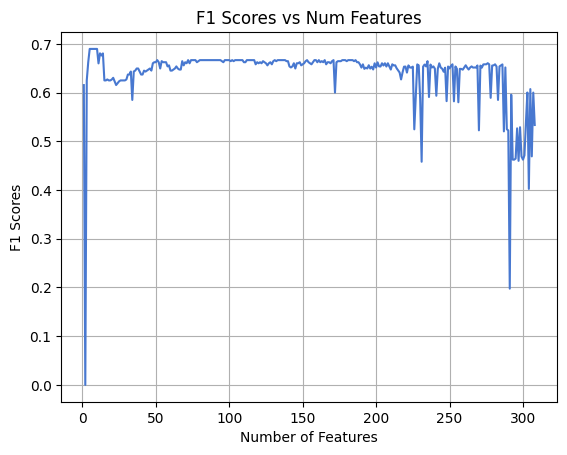

K calculated: 5
F1: 0.690 | Pr: 0.579 | Re: 1.000 | AUC: 0.617 | Accuracy: 0.625 



In [18]:
run_k_best_selector(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## fasttext vectors and xlmr sentiment

F1: 0.714 | Pr: 0.611 | Re: 1.000 | AUC: 0.711 | Accuracy: 0.667 



  0%|          | 0/308 [00:00<?, ?it/s]

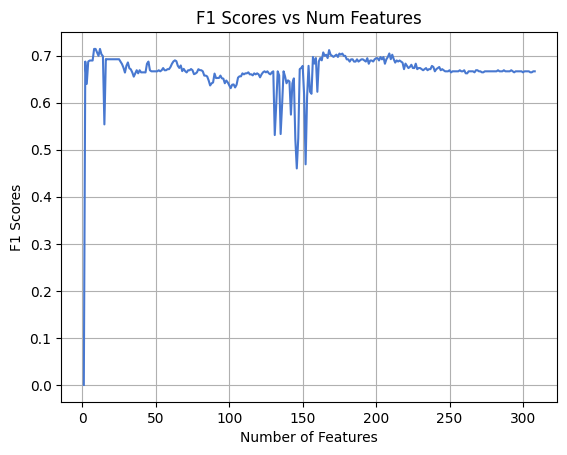

K calculated: 8
F1: 0.714 | Pr: 0.611 | Re: 1.000 | AUC: 0.743 | Accuracy: 0.667 



In [19]:
run_k_best_selector(train_features, test_features, y_train, y_test, feature_names_ft_xlmr)

# Pymagnitude vectors and xlmr sentiment

F1: 0.643 | Pr: 0.550 | Re: 0.900 | AUC: 0.711 | Accuracy: 0.654 



  0%|          | 0/308 [00:00<?, ?it/s]

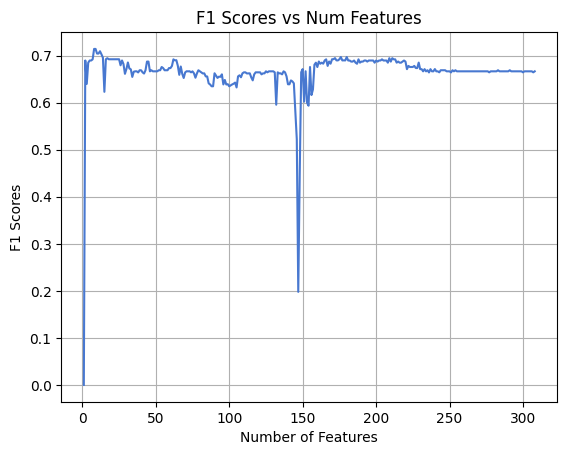

K calculated: 8
F1: 0.714 | Pr: 0.611 | Re: 1.000 | AUC: 0.743 | Accuracy: 0.667 



In [20]:
run_k_best_selector(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

# Select Percentile

In [21]:
from sklearn.feature_selection import SelectPercentile

def run_percentile_selector(train_features, test_features, y_train, y_test, feature_names):  
    f1_scores = []

    for percentage in tqdm_notebook(range(1, 101)):
        selector = SelectPercentile(percentile = percentage)
        train_features_selected = selector.fit_transform(train_features, y_train)
        test_features_selected = selector.transform(test_features)
        f1_scores.append(run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2, return_f1 = True, verbose = 0))
    f1_scores = np.array(f1_scores)
    
    %matplotlib inline

    x = list(range(1, 101))
    plt.plot(x, f1_scores)
    plt.xlabel('Percentage of Features')
    plt.ylabel('F1 Scores')
    plt.title('F1 Scores vs Num Features')
    plt.grid()
    plt.show()
    
    percentile = np.argmax(f1_scores) + 1
    print("percentile: " + str(percentile))
    
    selector = SelectPercentile(percentile = percentile)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2)

## Pymagnitude and German sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

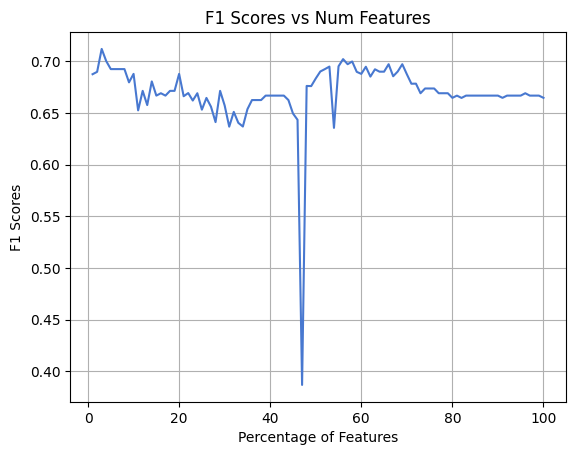

percentile: 3
F1: 0.709 | Pr: 0.605 | Re: 1.000 | AUC: 0.747 | Accuracy: 0.658 



In [22]:
run_percentile_selector(train_features, test_features, y_train, y_test, feature_names)

## Fasttext embeddings and xlmr sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

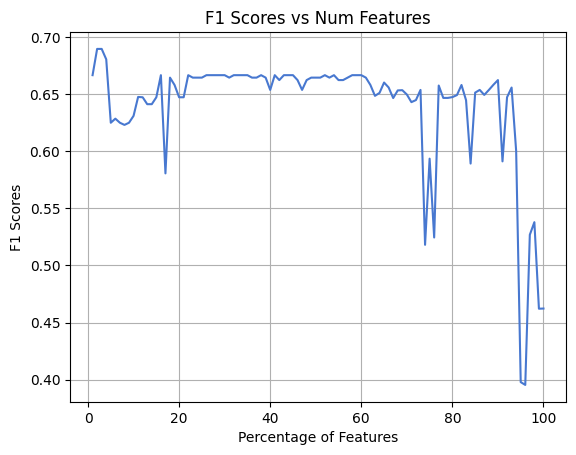

percentile: 2
F1: 0.690 | Pr: 0.579 | Re: 1.000 | AUC: 0.583 | Accuracy: 0.625 



In [23]:
run_percentile_selector(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## Pymagnitude embeddings and xlmr sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

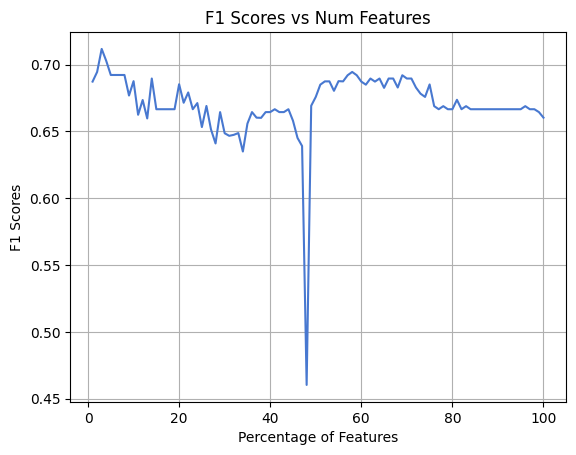

percentile: 3
F1: 0.707 | Pr: 0.601 | Re: 1.000 | AUC: 0.748 | Accuracy: 0.654 



In [24]:
run_percentile_selector(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

# RFECV (Recursive Feature Elimination)


RFE is a backward feature selection technique that uses an estimator to calculate the feature importance at each stage. The word recursive in the name implies that the technique recursively removes features that are not important for classifiction.

We'll use the CV variant which uses cross-validation inside each loop to determine how many features to remove in each loop. RFECV needs an estimator which has the feature_importances_ attribute so we'll use SGDClassifier with log loss.


In [25]:
# Since we have a hold out Test set that we would like to use - Let's create a `PredefinedSplit`
from sklearn.model_selection import PredefinedSplit
from sklearn.feature_selection import RFECV

def run_rf_elimination(train_features, test_features, y_train, y_test, feature_names):
    X = sparse.vstack((train_features, test_features))
    test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]     # We need to label -1 for the train set and 0 for test set
    y = np.concatenate([y_train, y_test])
    ps = PredefinedSplit(test_fold)
    
    log_reg = SGDClassifier(loss = 'log', alpha = 1e-3)
    selector = RFECV(log_reg, scoring = 'f1', n_jobs = -1, cv = ps, verbose = 1)
    selector.fit(X, y)
    
    # Now lets select the best features and check the performance
    train_features_selected = selector.transform(train_features)
    test_features_selected = selector.transform(test_features)

    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-1)

## Pymagnitude and German sentiment

In [26]:
run_rf_elimination(train_features, test_features, y_train, y_test, feature_names)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

## Fasttext embeddings and xlmr sentiment

In [27]:
run_rf_elimination(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

## Pymagnitude embeddings and xlmr sentiment

In [28]:
run_rf_elimination(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

### SFS (Sequential Forward Selection)
Finally, let's try SFS - which does the same thing as RFE instead adds features sequentially. SFS starts with 0 features and adds features 1-by-1 in each loop in a greedy manner. One small difference is that SFS solely uses the feature sets performance on the CV set as a metric for selecting the best features, unlike RFE which used model weights (feature_importances_)

In [29]:
# Note: MLxtend provides the SFS Implementation
from mlxtend.feature_selection import SequentialFeatureSelector


def run_sf_selection(train_features, test_features, y_train, y_test, feature_names):
    X = sparse.vstack((train_features, test_features))
    test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]     # We need to label -1 for the train set and 0 for test set
    y = np.concatenate([y_train, y_test])
    ps = PredefinedSplit(test_fold)
    
    log_reg = SGDClassifier(loss = 'log', alpha = 1e-2)

    selector = SequentialFeatureSelector(log_reg, k_features = 'best', floating = True, cv = ps, scoring = 'f1', verbose = 1, n_jobs = -1) # k_features = 'best' returns the best subset of features
    selector.fit(X.tocsr(), y)
    
    # Now lets select the best features and check the performance
    train_features_selected = selector.transform(train_features.tocsr())
    test_features_selected = selector.transform(test_features.tocsr())

    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2)
    
    log_reg.fit(train_features_selected, y_train)
    y_pred_prob = (log_reg.predict_proba(test_features_selected)[:,1])

    print_model_metrics(y_test, y_pred_prob, confusion = True)
    
    return selector, log_reg

## Pymagnitude with german sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.7s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.1s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

F1: 0.888 | Pr: 0.900 | Re: 0.982 | AUC: 0.973 | Accuracy: 0.896 

F1: 0.952 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.958 



(SequentialFeatureSelector(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                           estimator=SGDClassifier(alpha=0.01, loss='log'),
                           floating=True, k_features=(1, 309), n_jobs=-1,
                           scoring='f1', verbose=1),
 SGDClassifier(alpha=0.01, loss='log'))

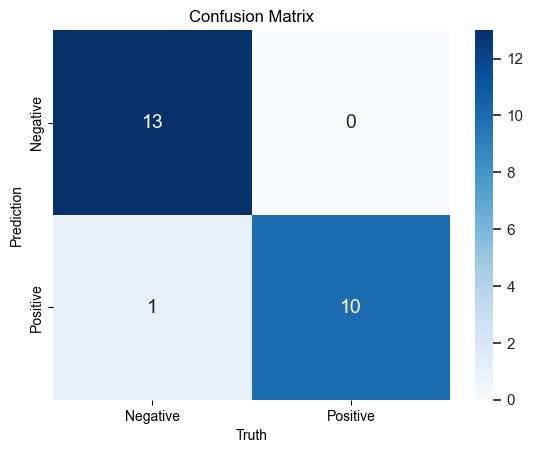

In [30]:
run_sf_selection(train_features, test_features, y_train, y_test, feature_names)

## fasttext with xlmr sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.1s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.1s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

F1: 0.847 | Pr: 0.865 | Re: 0.936 | AUC: 0.944 | Accuracy: 0.858 

F1: 0.818 | Pr: 0.833 | Re: 0.909 | AUC: 0.937 | Accuracy: 0.833 



(SequentialFeatureSelector(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                           estimator=SGDClassifier(alpha=0.01, loss='log'),
                           floating=True, k_features=(1, 309), n_jobs=-1,
                           scoring='f1', verbose=1),
 SGDClassifier(alpha=0.01, loss='log'))

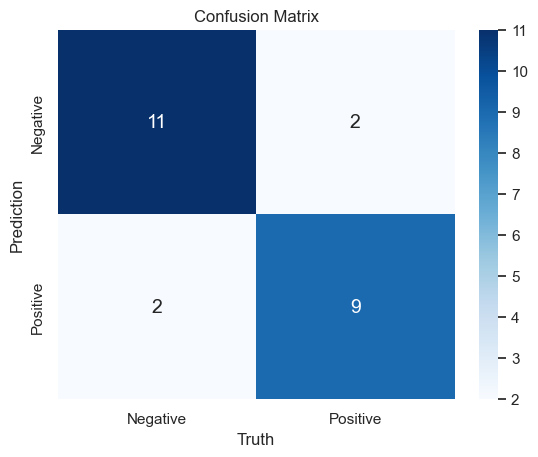

In [31]:
run_sf_selection(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## Pymagnitude with xlmr sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.1s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.1s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

F1: 0.901 | Pr: 0.911 | Re: 0.991 | AUC: 0.971 | Accuracy: 0.908 

F1: 0.952 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.958 



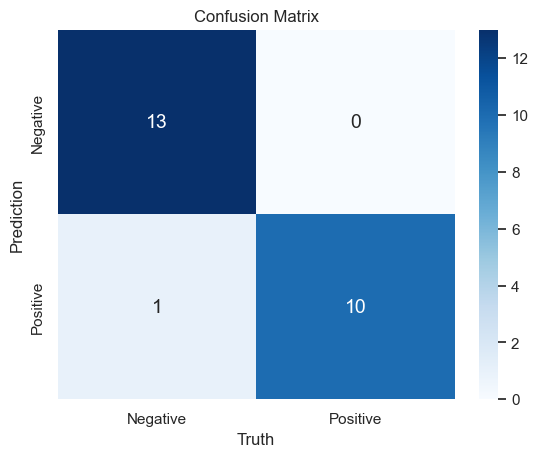

In [32]:
selector, logreg = run_sf_selection(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

Superb! We have the best accuracy with the fastest embedding model and the fastest sentiment model!!

## Save best classifier model

In [34]:
#import pickle
import joblib
#neuro_classifier = run_sf_selection(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)
selector_file = 'neuroticism_sf_selector.joblib'
log_reg_file = 'neuroticism_classifier.joblib'
joblib.dump(selector, selector_file)
joblib.dump(logreg, log_reg_file)


['neuroticism_classifier.joblib']

In [ ]:
#with open("neuroticism_logreg_classifier.pkl", "wb") as f:
#    pickle.dump(neuro_classifier, f)